<a href="https://colab.research.google.com/github/19Aastha99/Covid-19_ML/blob/main/Visualizations_and_Forecasting_in_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.metrics import r2_score

In [ ]:
# world=pd.read_csv("countries of the world2.csv")
world=pd.read_csv("Country_Dataset - Country_Dataset.csv")
# world[94:96]
world

,Country Name,Region,Population,Pop. Density (per sq. km.),Area (sq. km.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 100),Arable (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Aruba,LATIN AMER. & CARIB,105845.0,588.027778,180.0,1004.0,NaN,29100.000000,97.807419,NaN,11.111111,11.652,9.053,NaN,NaN,NaN
1,Afghanistan,ASIA (EX. NEAR EAST),37172386.0,56.937760,652860.0,-314602.0,48.0,493.750418,43.019718,59.120848,11.798854,32.487,6.423,22.042897,13.387247,59.477423
2,Angola,SUB-SAHARAN AFRICA,30809762.0,24.713052,1246700.0,32066.0,51.9,3289.646664,NaN,43.130519,3.930376,40.729,8.190,8.607742,47.931542,43.206909
3,Albania,EASTERN EUROPE,2866376.0,104.612263,27400.0,-69998.0,8.5,5284.380184,98.141151,94.176998,22.311898,11.780,7.898,18.440931,21.284030,47.740051
4,Andorra,WESTERN EUROPE,77006.0,163.842553,470.0,NaN,2.9,41793.055260,NaN,107.282549,1.765957,7.200,4.400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Samoa,OCEANIA,196130.0,69.303887,2830.0,-14013.0,13.3,4188.528346,99.095772,NaN,11.484099,24.378,5.239,9.769891,15.228027,75.002081
204,"Yemen, Rep.",NEAR EAST,28498687.0,53.977853,527970.0,-150000.0,43.6,824.117629,NaN,53.678933,2.079095,30.453,5.983,5.000962,35.610680,16.774757
205,South Africa,SUB-SAHARAN AFRICA,57792520.0,47.640752,1213090.0,727026.0,27.8,6372.605655,NaN,159.930664,9.892094,20.510,9.435,2.176020,25.853490,61.042730
206,Zambia,SUB-SAHARAN AFRICA,17351822.0,23.341479,743390.0,-40000.0,43.4,1516.390661,86.747963,89.157044,5.111718,36.192,6.456,3.341147,34.485328,54.244390


In [ ]:
world.describe()

,Population,Pop. Density (per sq. km.),Area (sq. km.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 100),Arable (%),Birthrate,Deathrate,Agriculture,Industry,Service
count,2.070000e+02,208.000000,2.080000e+02,1.910000e+02,192.000000,208.000000,78.000000,180.000000,200.000000,200.000000,200.000000,183.000000,185.000000,185.000000
mean,3.860461e+07,426.905257,6.427683e+05,3.286362e+04,21.384794,18684.669834,84.633659,110.484755,14.286292,19.636704,7.638898,10.156823,25.042218,56.287520
std,1.426100e+08,2001.415702,1.796334e+06,6.864856e+05,19.692916,27798.195141,19.140190,39.211276,13.556310,9.917619,2.663909,10.542283,11.515041,13.021091
min,1.150800e+04,0.136492,2.027000e+00,-3.266243e+06,1.600000,271.752044,34.522758,17.458708,0.086281,5.900000,1.202000,0.028407,1.305321,16.774757
25%,1.162728e+06,36.740350,1.201500e+04,-5.473700e+04,5.975000,2489.711912,76.695648,89.535423,3.922174,10.700000,5.812750,2.197475,17.307177,48.980045
50%,7.025037e+06,89.414994,1.009150e+05,-4.262000e+03,14.000000,6953.935629,94.395771,111.952756,10.862976,17.548500,7.202500,6.590108,24.492918,55.691693
75%,2.590609e+07,219.860269,4.794334e+05,5.055050e+04,32.225000,23452.521352,97.849699,131.816971,21.125072,27.296750,9.125000,15.341497,31.171477,64.690557
max,1.392730e+09,19198.662610,1.637687e+07,4.774029e+06,83.400000,185829.018000,99.992889,345.324522,59.800000,46.079000,15.400000,58.934410,63.243645,94.201715


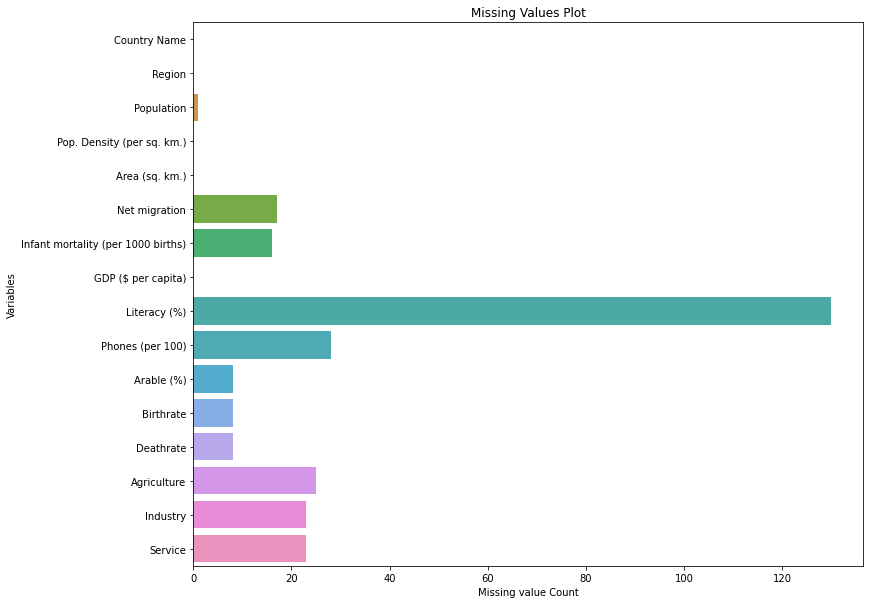

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(data=world.isnull().sum().reset_index(), y='index',x=0)
plt.ylabel('Variables')
plt.title('Missing Values Plot')
plt.xlabel('Missing value Count')
plt.show()

In [ ]:
for col in world.columns.values:
    if world[col].isnull().sum() == 0:
        continue
#     if col == 'Climate':
#         guess_values = world.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
#     else:
    guess_values = world.groupby('Region')[col].median()

    for region in world['Region'].unique():
        world[col].loc[(world[col].isnull())&(world['Region']==region)] = guess_values[region]

world = world.dropna()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
print(world.isnull().sum())
world.head(50)

Country Name                          0
Region                                0
Population                            0
Pop. Density (per sq. km.)            0
Area (sq. km.)                        0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 100)                      0
Arable (%)                            0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


,Country Name,Region,Population,Pop. Density (per sq. km.),Area (sq. km.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 100),Arable (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Aruba,LATIN AMER. & CARIB,1.058450e+05,588.027778,180.00,1004.0,13.20,29100.000000,97.807419,106.952579,11.111111,11.652,9.0530,5.296472,25.117223,59.325013
1,Afghanistan,ASIA (EX. NEAR EAST),3.717239e+07,56.937760,652860.00,-314602.0,48.00,493.750418,43.019718,59.120848,11.798854,32.487,6.4230,22.042897,13.387247,59.477423
2,Angola,SUB-SAHARAN AFRICA,3.080976e+07,24.713052,1246700.00,32066.0,51.90,3289.646664,74.804321,43.130519,3.930376,40.729,8.1900,8.607742,47.931542,43.206909
3,Albania,EASTERN EUROPE,2.866376e+06,104.612263,27400.00,-69998.0,8.50,5284.380184,98.141151,94.176998,22.311898,11.780,7.8980,18.440931,21.284030,47.740051
4,Andorra,WESTERN EUROPE,7.700600e+04,163.842553,470.00,161318.0,2.90,41793.055260,98.186226,107.282549,1.765957,7.200,4.4000,1.263533,19.690158,66.331657
6,Argentina,LATIN AMER. & CARIB,4.449450e+07,16.258510,2736690.00,24000.0,8.70,11633.498010,99.003868,132.093151,14.323873,17.021,7.6090,5.296472,23.058930,55.926022
8,American Samoa,OCEANIA,5.546500e+04,277.325000,200.00,-3999.0,21.25,11466.690710,99.095772,104.594126,15.000000,22.820,6.3290,15.226412,15.228027,66.653233
10,Australia,OCEANIA,2.498269e+07,3.247871,7692020.00,791229.0,3.10,57354.964050,99.095772,111.012255,4.026771,12.600,6.3000,2.458346,24.158967,66.653233
11,Austria,WESTERN EUROPE,8.840521e+06,107.131859,82520.00,324998.0,2.90,51478.285260,98.186226,123.535268,16.082768,9.700,9.5000,1.134383,25.489212,62.731019
13,Burundi,SUB-SAHARAN AFRICA,1.117538e+07,435.178271,25680.00,10003.0,41.20,271.752044,74.804321,56.534707,46.728972,39.008,7.9290,29.011900,11.107217,49.114983



Data Exploration


Top Countries with highest GDP per capita

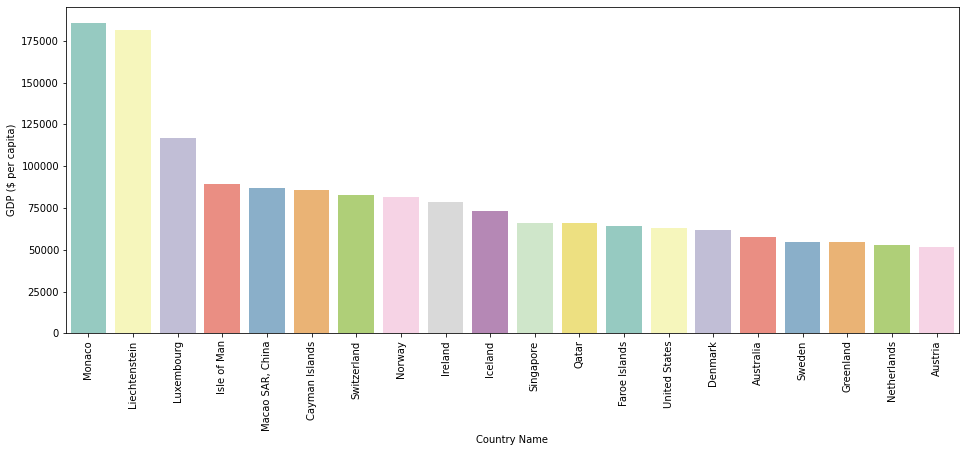

In [ ]:


fig, ax = plt.subplots(figsize=(16,6))
# sns.barplot(x='Country',y='GDP ($ per capita)',data=world.sort_values('GDP ($ per capita)',ascending=False).head(20), palette='Set3')
sns.barplot(x='Country Name',y='GDP ($ per capita)',data=world.sort_values('GDP ($ per capita)',ascending=False).head(20), palette='Set3')

plt.xticks(rotation=90)
plt.show()




Top Countries with lowest GDP per capita

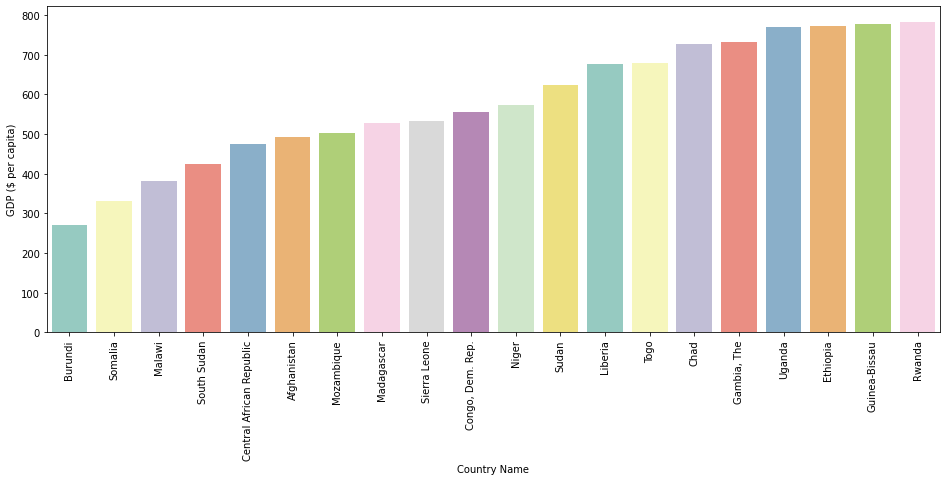

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country Name',y='GDP ($ per capita)',data=world.sort_values('GDP ($ per capita)',ascending=True).head(20), palette='Set3')
plt.xticks(rotation=90)
plt.show()


Top Countries with highest Total GDP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


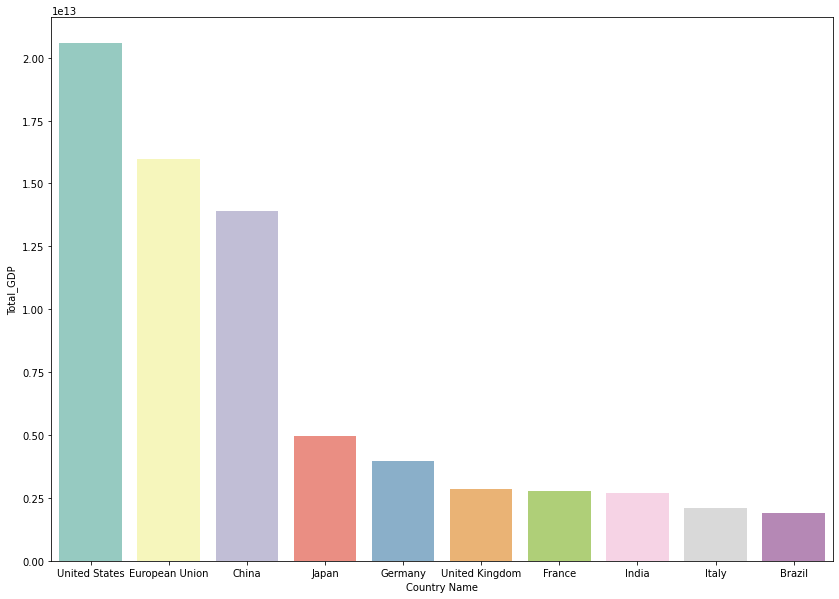

In [ ]:


world['Total_GDP'] = world['GDP ($ per capita)'] * world['Population']
plt.figure(figsize=(14,10))

sns.barplot(x='Country Name',y='Total_GDP',data=world.sort_values('Total_GDP',ascending=False).head(10),palette='Set3')




Share of Total GDP of Top 25 countries

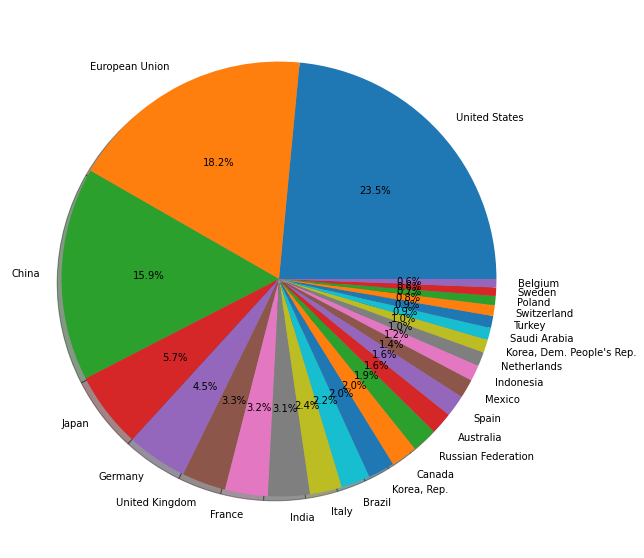

In [ ]:


plt.subplots(figsize=(14,10))
gdp=world.sort_values('Total_GDP',ascending=False).head(25)
plt.pie(gdp['Total_GDP'],labels=gdp['Country Name'],autopct='%1.1f%%',shadow=True);



Total GDP per capita by Region

In [ ]:
# plt.figure(figsize=(14,10))
# sns.boxplot(x="Region",y="GDP ($ per capita)",data=world,width=0.7,palette="Set3",fliersize=5)
# plt.xticks(rotation=90)
# plt.title("GDP BY REGİON",color="red")

## **Correlation between Variables**

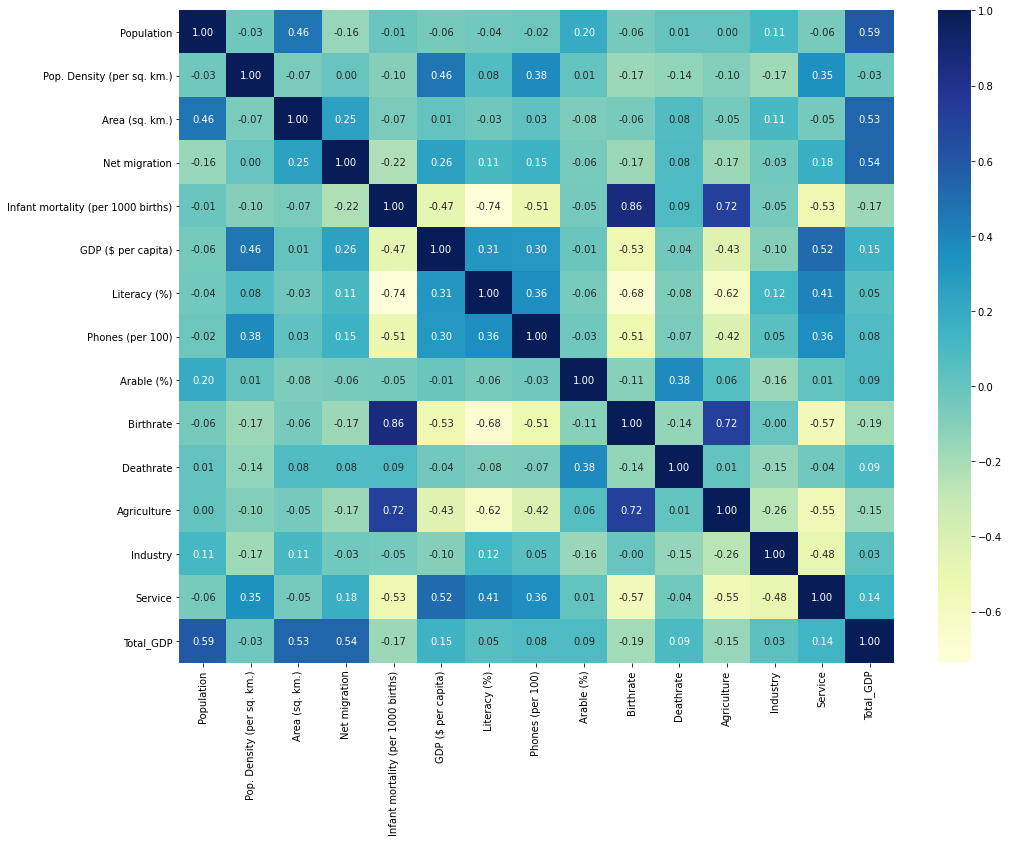

In [ ]:
plt.figure(figsize=(16,12))

sns.heatmap(world.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='YlGnBu')
plt.show()

In [ ]:
world.iloc[:,2:].corr().style.background_gradient(cmap='Blues').format("{:.3f}")

,Population,Pop. Density (per sq. km.),Area (sq. km.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 100),Arable (%),Birthrate,Deathrate,Agriculture,Industry,Service,Total_GDP
Population,1.000,-0.028,0.465,-0.155,-0.005,-0.056,-0.042,-0.020,0.196,-0.057,0.010,0.005,0.112,-0.062,0.588
Pop. Density (per sq. km.),-0.028,1.000,-0.066,0.001,-0.103,0.463,0.077,0.377,0.007,-0.172,-0.139,-0.098,-0.173,0.346,-0.026
Area (sq. km.),0.465,-0.066,1.000,0.254,-0.066,0.006,-0.028,0.025,-0.078,-0.061,0.077,-0.049,0.106,-0.051,0.532
Net migration,-0.155,0.001,0.254,1.000,-0.221,0.257,0.107,0.155,-0.060,-0.171,0.078,-0.170,-0.031,0.179,0.538
Infant mortality (per 1000 births),-0.005,-0.103,-0.066,-0.221,1.000,-0.469,-0.736,-0.512,-0.051,0.863,0.085,0.722,-0.047,-0.532,-0.167
GDP ($ per capita),-0.056,0.463,0.006,0.257,-0.469,1.000,0.310,0.305,-0.009,-0.532,-0.038,-0.433,-0.104,0.515,0.146
Literacy (%),-0.042,0.077,-0.028,0.107,-0.736,0.310,1.000,0.356,-0.060,-0.684,-0.081,-0.619,0.122,0.414,0.052
Phones (per 100),-0.020,0.377,0.025,0.155,-0.512,0.305,0.356,1.000,-0.029,-0.513,-0.071,-0.415,0.047,0.361,0.081
Arable (%),0.196,0.007,-0.078,-0.060,-0.051,-0.009,-0.060,-0.029,1.000,-0.105,0.382,0.060,-0.163,0.014,0.087
Birthrate,-0.057,-0.172,-0.061,-0.171,0.863,-0.532,-0.684,-0.513,-0.105,1.000,-0.141,0.716,-0.002,-0.566,-0.193


Top Factors affecting GDP per capita.
We pick the five columns that mostly correlate to GDP per capita and make scatter plots.

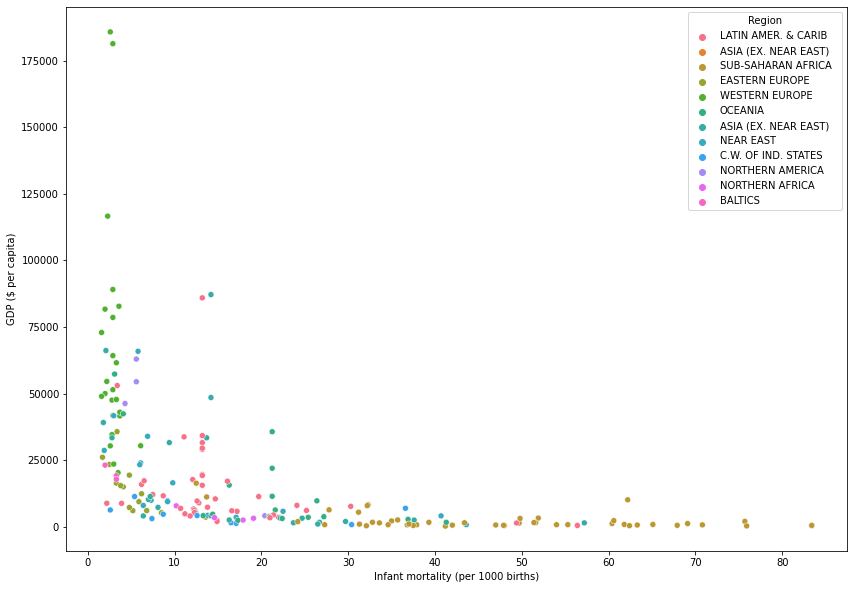

In [ ]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Infant mortality (per 1000 births)',y='GDP ($ per capita)',hue='Region')


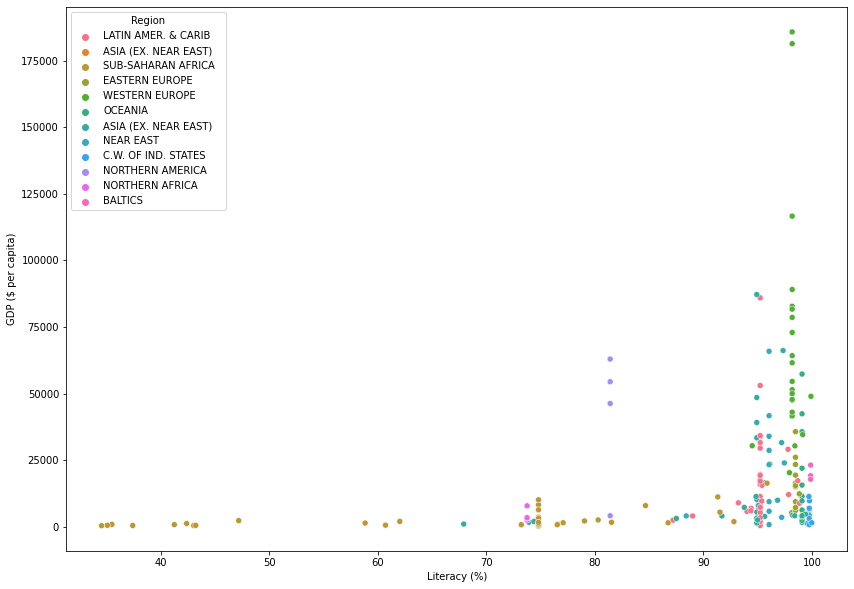

In [ ]:


plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Literacy (%)',y='GDP ($ per capita)',hue='Region')




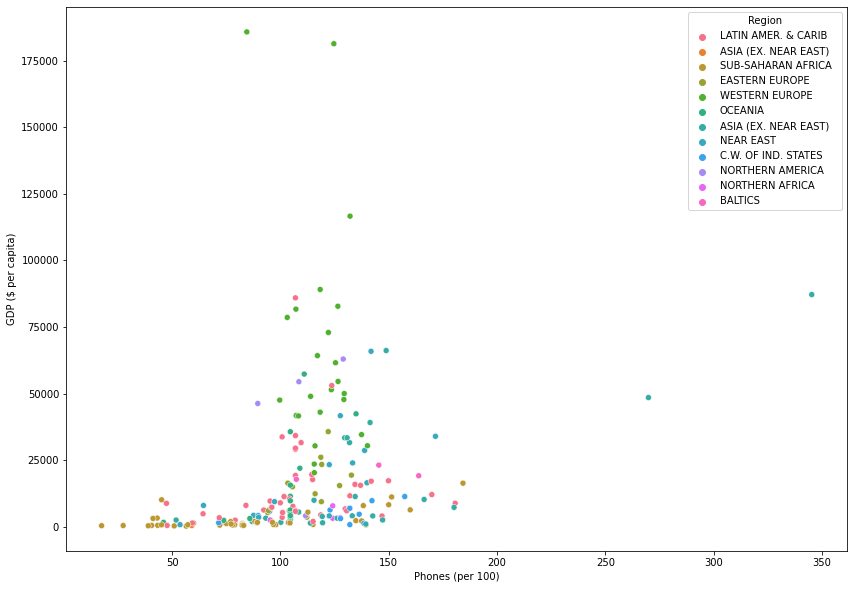

In [ ]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Phones (per 100)',y='GDP ($ per capita)',hue='Region')

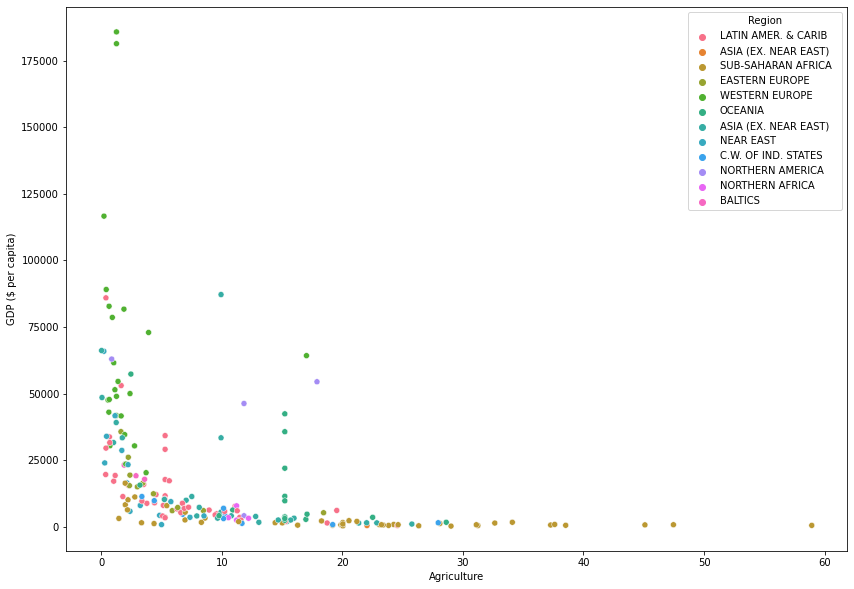

In [ ]:


plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Agriculture',y='GDP ($ per capita)',hue='Region')



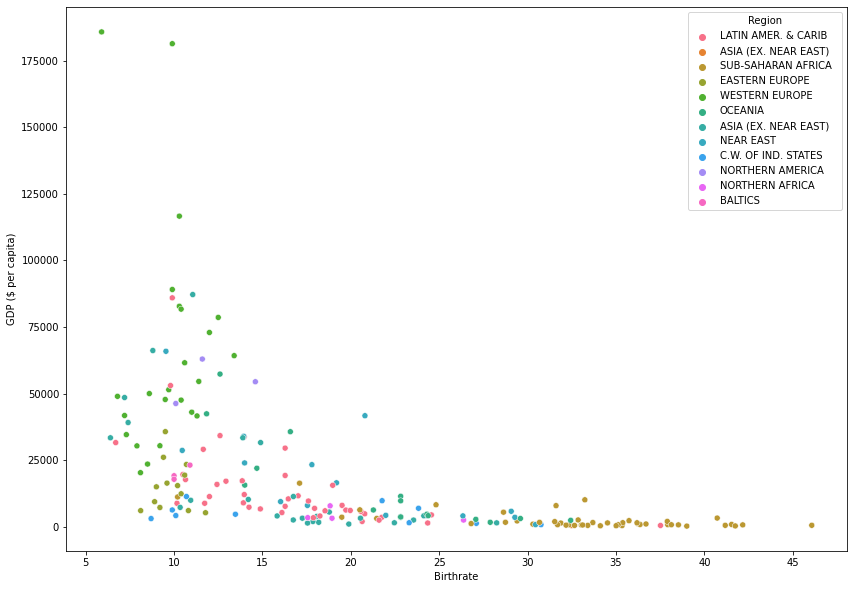

In [ ]:


plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Birthrate',y='GDP ($ per capita)',hue='Region')




Comparison of the economy structure for the ten countries with highest total GDP

<Figure size 1152x864 with 0 Axes>

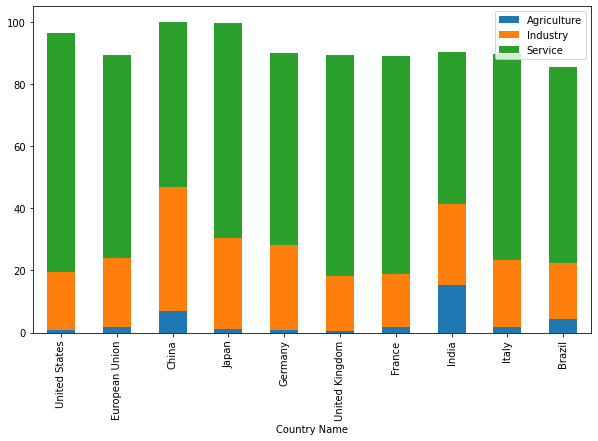

In [ ]:

gdp=world.sort_values('Total_GDP',ascending=False).head(25)
plt.figure(figsize=(16,12))
gdp[['Country Name','Agriculture', 'Industry', 'Service']].set_index('Country Name').head(10).plot.bar(stacked=True,figsize=(10,6))




Modeling
Training and Testing

In [ ]:
LE = LabelEncoder()
world['Region_label'] = LE.fit_transform(world['Region'])
# world['Climate_label'] = LE.fit_transform(world['Climate'])
world.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country Name,Region,Population,Pop. Density (per sq. km.),Area (sq. km.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 100),Arable (%),Birthrate,Deathrate,Agriculture,Industry,Service,Total_GDP,Region_label
0,Aruba,LATIN AMER. & CARIB,105845.0,588.027778,180.0,1004.0,13.2,29100.000000,97.807419,106.952579,11.111111,11.652,9.053,5.296472,25.117223,59.325013,3.080090e+09,5
1,Afghanistan,ASIA (EX. NEAR EAST),37172386.0,56.937760,652860.0,-314602.0,48.0,493.750418,43.019718,59.120848,11.798854,32.487,6.423,22.042897,13.387247,59.477423,1.835388e+10,1
2,Angola,SUB-SAHARAN AFRICA,30809762.0,24.713052,1246700.0,32066.0,51.9,3289.646664,74.804321,43.130519,3.930376,40.729,8.190,8.607742,47.931542,43.206909,1.013532e+11,10
3,Albania,EASTERN EUROPE,2866376.0,104.612263,27400.0,-69998.0,8.5,5284.380184,98.141151,94.176998,22.311898,11.780,7.898,18.440931,21.284030,47.740051,1.514702e+10,4
4,Andorra,WESTERN EUROPE,77006.0,163.842553,470.0,161318.0,2.9,41793.055260,98.186226,107.282549,1.765957,7.200,4.400,1.263533,19.690158,66.331657,3.218316e+09,11


In [ ]:
train, test = train_test_split(world, test_size=0.159, shuffle=False)

training_features = ['Population', 'Area (sq. km.)',
       'Pop. Density (per sq. km.)',
       'Net migration', 'Infant mortality (per 1000 births)',
      'Phones (per 100)',
       'Arable (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry',
       'Service']



target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

Random Forest Regressor

In [ ]:

model = RandomForestRegressor(n_estimators = 100,
                             max_depth = 11,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
print('Testing Features Shape:', test_X.shape)

Testing Features Shape: (33, 12)


In [ ]:


#print('Training Score :',model.score(train_X,train_Y))
print(f'Train score : ',r2_score(test_Y,test_pred_Y))



Train score :  0.8069138698152413



Linear Regression Model

In [ ]:
model1 = LinearRegression()
model1.fit(train_X, train_Y)
train_pred_Y = model1.predict(train_X)
test_pred_Y = model1.predict(test_X)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:


print('Training Score : ',model1.score(train_X,train_Y))
print(f'Test score : ',r2_score(test_Y,test_pred_Y))



Training Score :  0.4890336780131631
Test score :  0.44516188985198



Visualization of Results

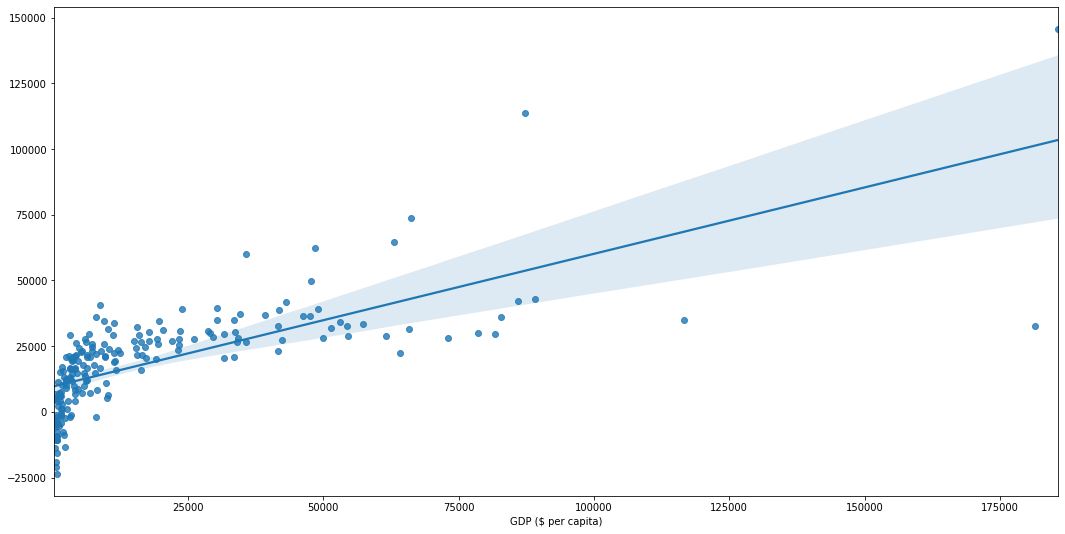

In [ ]:
plt.figure(figsize=(18,9))
whole=model1.predict(world[training_features])
sns.regplot(x=world[target],y=whole)

In [ ]:
df = pd.DataFrame(columns = training_features)
#India dataset
df = df.append({'Population': 1380004385, 'Area (sq. km.)':3287263,
      'Pop. Density (per sq. km.)':419.80,
      'Net migration':-0.369, 'Infant mortality (per 1000 births)':29.848 ,
       'Phones (per 100)':110.18,
      'Arable (%)':52.61, 'Birthrate':17.592,
      'Deathrate':7.344, 'Agriculture':19.9, 'Industry':27.30,
      'Service':40.41},ignore_index = True)
#India dataset (deathrates with covid):
#no.of deaths due to covid:377031



#CHINA
df = df.append({'Population': 1439323776, 'Area (sq. km.)':9562910.00,
       'Pop. Density (per sq. km.)':150.51,
       'Net migration':-0.249, 'Infant mortality (per 1000 births)':9.295 ,
       'Phones (per 100)':113.38,
       'Arable (%)':12.68	,  'Birthrate':11.416,
       'Deathrate':7.402,'Agriculture':7.7, 'Industry': 37.8,
       'Service':54.5},ignore_index = True)
#death rate including covid: 7.405


#GERMANY
df = df.append({'Population': 83783942, 'Area (sq. km.)':357580.00,
       'Pop. Density (per sq. km.)':234.31,
       'Net migration':4.632, 'Infant mortality (per 1000 births)':2.767 ,
      'Phones (per 100)':130.1,
       'Arable (%)':33.58	, 'Birthrate':9.397,
       'Deathrate':11.392,'Agriculture':0.7, 'Industry':22.9,
       'Service':70.4 },ignore_index = True)
#death rate including covid: 12.465

#FRANCE
df = df.append({'Population':65273511 , 'Area (sq. km.)':549086.99,
       'Pop. Density (per sq. km.)':118.88,
       'Net migration':0.723, 'Infant mortality (per 1000 births)':2.890 ,
       'Phones (per 100)':114.2,
       'Arable (%)':33.1,'Birthrate':11.107,
       'Deathrate':9.365,'Agriculture':1.6, 'Industry':17.4,
       'Service':70.19},ignore_index = True)
#death rate including covid: 11.044

In [ ]:

df



,Population,Area (sq. km.),Pop. Density (per sq. km.),Net migration,Infant mortality (per 1000 births),Phones (per 100),Arable (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,1.380004e+09,3287263.00,419.80,-0.369,29.848,110.18,52.61,17.592,7.344,19.9,27.3,40.41
1,1.439324e+09,9562910.00,150.51,-0.249,9.295,113.38,12.68,11.416,7.402,7.7,37.8,54.50
2,8.378394e+07,357580.00,234.31,4.632,2.767,130.10,33.58,9.397,11.392,0.7,22.9,70.40
3,6.527351e+07,549086.99,118.88,0.723,2.890,114.20,33.10,11.107,9.365,1.6,17.4,70.19


In [ ]:
#np.any(np.isnan(df))
result = model.predict(df)
result


array([ 4160.06417109, 15423.26149312, 49054.81055657, 42332.62222782])

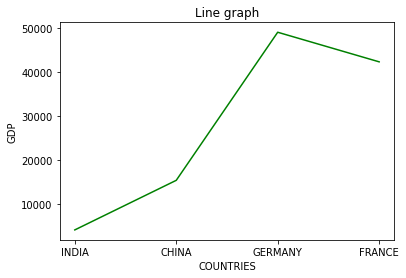

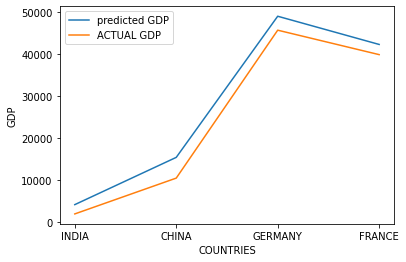

<Figure size 1332x756 with 0 Axes>

In [ ]:
x = ["INDIA","CHINA","GERMANY","FRANCE"]
true_result = np.array([1947.417,10483,45732,39907])
# plotting
plt.title("Line graph")
plt.xlabel("COUNTRIES")
plt.ylabel("GDP")
plt.plot(x, result, color ="green")
plt.show()




plt.xlabel("COUNTRIES")
plt.ylabel("GDP")
plt.plot(x, result, label = "predicted GDP")
plt.plot(x, true_result, label = "ACTUAL GDP")
plt.legend()
plt.show()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
test_result = [4160.06417109, 15423.26149312, 49054.81055657, 42332.62222782]
print(f'Test score : ',r2_score(true_result,test_result))

Test score :  0.9668213732034823


Unemployment analysis

In [ ]:
import calendar

In [ ]:
import datetime as dt
import plotly.io as pio
pio.templates


Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML


In [ ]:
ue = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [ ]:
#ue.head()
ue.head(25)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.7400
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.7400
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.7400
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.7400
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.7400
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.7400
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.7400
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.7400
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.7400
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.7400


In [ ]:
ue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
ue.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
ue.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']
ue['Date'] = pd.to_datetime(ue['Date'],dayfirst=True)

ue['Frequency']= ue['Frequency'].astype('category')

ue['Month'] = ue['Date'].dt.month

ue['Month_int'] =ue['Month'].apply(lambda x : int(x))

ue['Month_name'] =ue['Month_int'].apply(lambda x: calendar.month_abbr[x])

ue['Region'] = ue['Region'].astype('category')

ue.drop(columns='Month',inplace=True)
ue.head(3)



,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


In [ ]:
#estimated_unemp_rate=df_I1['Estimated Unemployment Rate'].reset_index()

In [ ]:
df_stats = ue[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]
round(df_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [ ]:

region_stats = ue.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


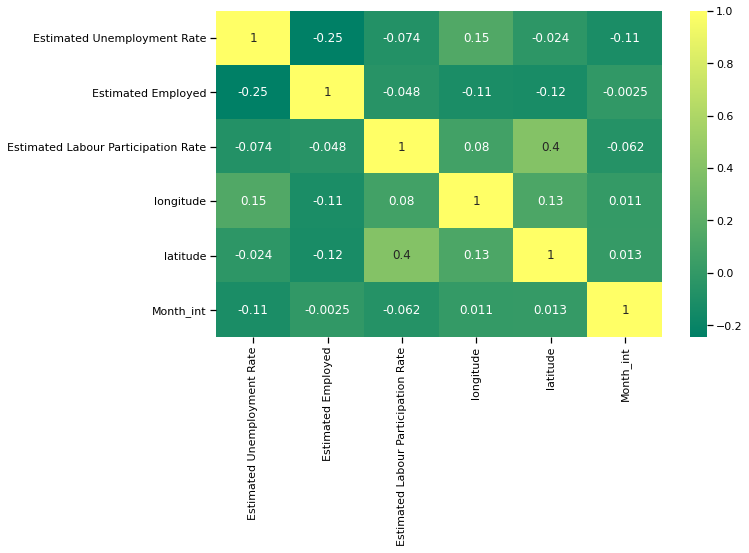

In [ ]:
heat_maps = ue[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate','longitude', 'latitude', 'Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

In [ ]:
fig = px.box(ue,x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment rate',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# The below box shows unemployement rate in each state in India

In [ ]:
fig = px.scatter_matrix(ue,template='plotly',dimensions=['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate'],color='Region')
fig.show()

In [ ]:
plot_ump = ue[['Estimated Unemployment Rate','States']]

df_unemp = plot_ump.groupby('States').mean().reset_index()

df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()



In [ ]:
fig = px.bar(ue, x='Region',y='Estimated Unemployment Rate',animation_frame = 'Month_name',color='States',
            title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()



In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 211kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
unemplo_df = ue[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]

unemplo = unemplo_df.groupby(['Region','States'])['Estimated Unemployment Rate'].mean().reset_index()

fig = px.sunburst(unemplo,path=['Region','States'], values='Estimated Unemployment Rate',color_continuous_scale='Plasma',title= 'unemployment rate in each region and state',height=650,template='ggplot2')
fig.show()

### **Impact of Lockdown on States Estimated Employed**

On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days

In [ ]:
fig = px.scatter_geo(ue,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impact of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [ ]:
lock = ue[(ue['Month_int'] >= 4) & (ue['Month_int'] <=7)]

bf_lock = ue[(ue['Month_int'] >= 1) & (ue['Month_int'] <=4)]
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()


g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']

g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

g_lock.head(2)

,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250


In [ ]:
# Percentage change in unemployment rate
g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)
plot_per = g_lock.sort_values('percentage change in unemployment')
# Percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='Percentage change in Unemployment in each state after lockdown',template='ggplot2')

fig.show()

## **Most impacted states/UT**
* Puducherry
* Jharkhand
* Bihar
* Haryana
* Tripura

In [ ]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))
fig = px.bar(plot_per, y='States',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)


fig.show()